## 第八回課題

以下の項目についてまとめよ.

1. $K = 1$, $\omega_n = 1$ rad/s の 2 次システムの $\zeta = 0.1, 0.3, 0.8$ の 3 通りについて，ゲイン線図と位相線図をそれぞれ重ねてプロットせよ。$\omega$ の範囲は $10^−1$　rad/s から $10^1$　rad/s とする。
2. Python-control で $K = 1$, $\omega_n = 1$ rad/s, $\zeta = 0.3$ の 2 次システムの共振角周波数を調べ，講義で求めた式で計算した場合と一致することを確認せよ。

### $K = 1$, $\omega_n = 1$ rad/s の 2 次システムの $\zeta = 0.1, 0.3, 0.8$ の 3 通りについて，ゲイン線図と位相線図をそれぞれ重ねてプロットせよ。$\omega$ の範囲は $10^−1$　rad/s から $10^1$　rad/s とする。

In [1]:
# 各種ライブラリインポート
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#グラフスタイル設定
color = ["blue", "green", "red"]
linestyle = ["-", "--", "-."]

In [3]:

#伝達関数の定義
K = 1.0
wn = 1.0

zeta = [0.1, 0.3, 0.8]

g_dB = [0, 0, 0]
p_deg = [0, 0, 0]

In [8]:
for i in range(len(zeta)):
    n = [K * wn**2]
    d = [1, 2*zeta[i]*wn, wn**2]
    P = tf(n, d)

    w = np.logspace(-1, 1, 100)
    gain, phase, w = bode(P, w, Plot=False)
    g_dB[i] = 20 * np.log10(gain)
    p_deg[i] = phase * 180 / np.pi

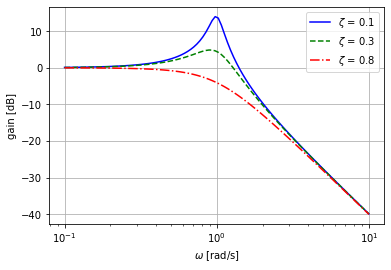

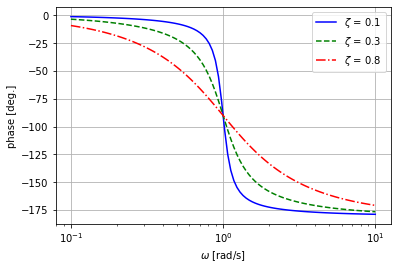

In [9]:
for i in range(3):
    plt.semilogx(w, g_dB[i], color=color[i], linestyle=linestyle[i],
                label="$\zeta$ = {}".format(zeta[i]))
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.grid()
plt.legend()
plt.show()

for i in range(3):
    plt.semilogx(w, p_deg[i], color=color[i], linestyle=linestyle[i],
                 label="$\zeta$ = {}".format(zeta[i]))
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.grid()
plt.legend()
plt.show()


### Python-control で $K = 1$, $\omega_n = 1$ rad/s, $\zeta = 0.3$ の 2 次システムの共振角周波数を調べ，講義で求めた式で計算した場合と一致することを確認せよ。

In [7]:
n = [K * wn**2]
d = [1, 2*zeta[1]*wn, wn**2]
P = tf(n, d)

w = np.logspace(-1, 1, 100)
gain, phase, w = bode(P, w, Plot=False)

index_max = np.argmax(gain)
wr = w[index_max]

print("zeta = {}, wr = {}".format(zeta[1], wr))


zeta = 0.3, wr = 0.8902150854450388


$
    \begin{align}
    \omega_r &= \omega_n \sqrt{|1-2\zeta^2|} \\
    &= \sqrt{|1-2\cdot 0.3^2|} \\
    &= \sqrt{|1- 1.8|} \\
    &= \sqrt{|- 0.8|} \\
    &\approx 0.894427 
    \end{align}
$

講義で求めた式と，Python-Controlの出力は小数点以下2桁まで一致した．